In [1]:
%run ../talktools.py

# Plotting and Visualization
Astronomy Data Lab (AY128/256; adapted from [github](https://github.com/profjsb/python-seminar))

J. S. Bloom (2016, 2018, 2019)

## Installation

```bash
conda install basemap matplotlib bokeh datashader \
              seaborn ipywidgets
conda install -c conda-forge altair plotly bqplot

pip install vega3 pdvega
jupyter nbextension install --sys-prefix --py vega3
jupyter nbextension enable vega --py --sys-prefix
jupyter nbextension enable vega3 --py --sys-prefix
```

### A reminder:
```bash
# git clone https://github.com/ucb-datalab/course-materials
cd course-materials
git pull
```

If you plan on going through the notebooks with me, I strongly suggest that you copy the .ipynb files, e.g.:
```bash
cp a_plotting_and_viz_intro.ipynb my_a_plotting_and_viz_intro.ipynb
```
this will help avoid merge conflicts later on.

You should be familiar with the basics of `numpy` arrays: creation and manipulation. 

Good starting points to brush up on this are:
 
 <ul>
    <li>The online <a href="http://www.scipy-lectures.org/">Scipy Lecture notes</a>, especially chapter 1.3.
    <li>Stefán Van Der Walt, S. Chris Colbert, Gaël Varoquaux. <a href="https://hal.inria.fr/inria-00564007/document">The NumPy array: a structure for efficient numerical computation</a>. Computing in Science and Engineering, Institute of Electrical and Electronics Engineers, 2011, 13 (2), pp. 22&ndash;30.
</ul>


You may also find yourself using `pandas` a lot in this class. While not a requirement to use `pandas` for array manipulation, it's worth understanding some of the basics. UC Berkeley students can get access to [Wes McKinney's book on pandas](https://proquest-safaribooksonline-com.libproxy.berkeley.edu/9781491957653).

# Outline


1. Plotting and visualization: overview & motivation
2. `Matplotlib` / `Seaborn`
3. 3d rendering with `matplotlib` (also `yt`, briefly)
4. Interactive with `matplotlib`, `widgets`, and `Bokeh`
5. "Big data" exploration with `datashader`


<img src="https://www.evernote.com/l/AUVM_nsHxwxMU4IwxVdaZlTaOxRad1hL-lAB/image.png">
Source: B. Grainger (PyData 2016) https://www.youtube.com/watch?v=aRxahWy-ul8
[declarative: what should be done, imperative: how it should be done]

Ideally, we'd like for you to:

- Know how to make and polish figures to the point where they can go to a journal.
- Understand matplotlib's internal model enough to:
  - know where to look for knobs to fine-tune
  - better understand the help and examples online
  - use it as a development platform for complex visualization
- (optional) Be able to build basic interactive viz (in the browser)

# Plotting and visualization: overview & motivation

Major uses of plotting and viz in (data) science workflows:

  1. (Initial) **Understanding** - What's there? what's missing? What patterns are worth exploring? What more data do I need?
  2. **Exploration** - deeper dive into the "meaning". Often cyclical/iterative.
  3. **Presentation** - results, telling stories with data (and potentially allowing others to explore)
      - different requirements for data science vs science

## Always visualize your data!


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# If you're reading in an image
# !conda install pillow -y
#import matplotlib.image as mpimg
#data = mpimg.imread("data/my_data_file.jpg")

# or read in a numpy array
import numpy as np
data = np.load("data/my_data_file.npy")

In [3]:
data.shape

(100, 100, 3)

In [4]:
import pandas as pd
df = pd.DataFrame(data[:,:,0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 100 columns):
0     100 non-null uint8
1     100 non-null uint8
2     100 non-null uint8
3     100 non-null uint8
4     100 non-null uint8
5     100 non-null uint8
6     100 non-null uint8
7     100 non-null uint8
8     100 non-null uint8
9     100 non-null uint8
10    100 non-null uint8
11    100 non-null uint8
12    100 non-null uint8
13    100 non-null uint8
14    100 non-null uint8
15    100 non-null uint8
16    100 non-null uint8
17    100 non-null uint8
18    100 non-null uint8
19    100 non-null uint8
20    100 non-null uint8
21    100 non-null uint8
22    100 non-null uint8
23    100 non-null uint8
24    100 non-null uint8
25    100 non-null uint8
26    100 non-null uint8
27    100 non-null uint8
28    100 non-null uint8
29    100 non-null uint8
30    100 non-null uint8
31    100 non-null uint8
32    100 non-null uint8
33    100 non-null uint8
34    100 non-null uint8
35    100 non-null u

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.00000,...,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0
mean,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,155.980000,156.06000,...,153.900000,153.840000,151.77000,156.200000,156.060000,155.910000,156.0,156.0,156.0,156.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.082272,0.74968,...,9.802597,10.809386,14.33922,1.154701,1.229437,1.239868,0.0,0.0,0.0,0.0
min,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,152.000000,153.00000,...,96.000000,95.000000,97.00000,152.000000,153.000000,150.000000,156.0,156.0,156.0,156.0
25%,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.000000,156.00000,...,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.0,156.0,156.0,156.0
50%,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.000000,156.00000,...,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.0,156.0,156.0,156.0
75%,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.000000,156.00000,...,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.0,156.0,156.0,156.0
max,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,161.000000,160.00000,...,161.000000,166.000000,161.00000,159.000000,162.000000,162.000000,156.0,156.0,156.0,156.0


In [6]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
95,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
96,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
97,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
98,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
99,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156


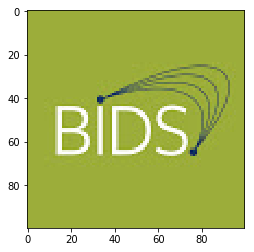

In [7]:
plt.imshow(data)
plt.show()

Looking at your data not just for images/arrays. Critical for point data too.

### Anscombe's Quartet

<p><a href="https://commons.wikimedia.org/wiki/File:Anscombe%27s_quartet_3.svg#/media/File:Anscombe%27s_quartet_3.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" alt="Anscombe's quartet 3.svg"></a><br>By <a href="//commons.wikimedia.org/wiki/File:Anscombe.svg" title="File:Anscombe.svg">Anscombe.svg</a>: <a href="//commons.wikimedia.org/wiki/User:Schutz" title="User:Schutz">Schutz</a>
derivative work (label using subscripts): <a href="//commons.wikimedia.org/wiki/User:Avenue" title="User:Avenue">Avenue</a> (<a href="//commons.wikimedia.org/wiki/User_talk:Avenue" title="User talk:Avenue"><span class="signature-talk">talk</span></a>) - <a href="//commons.wikimedia.org/wiki/File:Anscombe.svg" title="File:Anscombe.svg">Anscombe.svg</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=9838454">https://commons.wikimedia.org/w/index.php?curid=9838454</a></p>

<img src="https://www.evernote.com/l/AUX2p-SfsmVAyZk9cnT7OqaI55Ru3JOmlMkB/image.png">

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [8]:
from IPython.display import HTML
HTML("""
<video width="620" controls>
  <source src="https://pbs.twimg.com/tweet_video/CrIDuOhWYAAVzcM.mp4" type="video/mp4">
</video>
""")

From https://twitter.com/JustinMatejka/status/770682771656368128"
Called ... Anscombosaurus

## How you decide to show data is part of the story itself

Some basic thoughts:

 1. No more lines, colors, points than you need to tell the story.
 2. But, no removing data for no other reason than it doesn't tell your story.
 3. Figures for talks and publications should be (almost) self-describing. An expert in your field should get the point.
 4. Figures are the centerpiece of your paper: most people will remember a visual better than they'll remember your abstract.
 5. I usually build the figures first, then write the meaty sections, then the conclusions, then the abstract, then the title.
 
"Ten Simple Rules for Better Figures":
http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833

## Pie Charts: no.

Only two exceptions where this is ok...

<img src="http://i1.wp.com/flowingdata.com/wp-content/uploads/2008/09/Pie-I-have-Eaten.jpg">

<img src="https://i0.wp.com/flowingdata.com/wp-content/uploads/2014/12/Pie-Pyramid-e1417455667996.png">

## Bring on the box plots

<img src="http://www.nature.com/nmeth/journal/v11/n2/images/nmeth.2813-F1.jpg">

Sample BoxPlotR plots. Top: Simple Tukey-style box plot. Bottom: Tukey-style box plot with notches, means (crosses), 83% confidence intervals (gray bars; representative of p=0.05 significance) and n values.

http://blogs.nature.com/methagora/2014/01/bring-on-the-box-plots-boxplotr.html



In [12]:
from IPython.display import HTML
HTML("""
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Animation showing how a boxplot may hide very different data patterns.<br>
<br>By <a href="https://twitter.com/JustinMatejka?ref_src=twsrc%5Etfw">@JustinMatejka</a> <a href="https://t.co/Zmk10ZTflU">pic.twitter.com/Zmk10ZTflU</a></p>&mdash; Lionel Page (@page_eco) <a href="https://twitter.com/page_eco/status/1055785592829698048?ref_src=twsrc%5Etfw">October 26, 2018</a></blockquote> 
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")


## Some Astronomy Plots

<img src="http://www.nature.com/nature/journal/v480/n7377/images/nature10646-f2.2.jpg" width="60%">

**Progenitor system constraints in a Hertzsprung–Russell diagram.**  Li, Bloom, et al., Nature 480, 348–350 (15 December 2011).

The thick yellow line is the 2σ limit in MV against effective temperature at the supernova location (see text) from a combination of the four Hubble Space Telescope filters, weighted using synthetic colours of redshifted stellar spectra at solar metallicity for that temperature and luminosity class. A more conservative limit comes from taking the single filter that most constrains the stellar type and luminosity class; shown is the 2σ limit assuming the adopted distance modulus27,28 of 29.05 mag (middle grey curve at the bottom of the yellow shading) with a total uncertainty of 0.23 mag (top/bottom grey curve at the bottom of the yellow shading). We also show the theoretical estimates (He-star channel13,14) and observed candidate systems (V445 Pup17, RS Oph16, U Sco18,29 and T CrB16). The grey-shaded rectangle shows the location of V445 Pup. Also plotted are the theoretical evolutionary tracks (from 1 Myr to 13 Gyr) of isolated stars for a range of masses for solar metallicity; note that the limits on the progenitor mass of SN 2011fe under the supersolar metallicity assumption are similar to those represented here. The grey curve at top is the limit inferred from Hubble Space Telescope analysis of SN 2006dd, representative of the other nearby type Ia supernova progenitor limits (see Supplementary Information). For the helium-star channel, bolometric luminosity corrections to the V band are adopted on the basis of effective temperature30. For an effective temperature of 3,000–4,000 K, as expected for the red-giant-branch stars, the MV limit excludes progenitors brighter than an absolute I-band magnitude of MI ≈ −2. This limit is 2 mag fainter than the observed28 tip of the red-giant branch in M101 and places an upper bound to the radius of ≲ for an effective temperature of 3,500 K on any red-giant branch progenitor. In a progenitor model that requires RLOF, this limit then demands an orbital period smaller than 260 to 130 days in a binary system with a  white dwarf (where the range of orbital period accommodates the  range allowed for a red-giant-branch star). The foreground Galactic and M101 extinction due to dust is negligible7 and is taken to be AV = 0 mag here. Had a source at the 2.0σ photometric level been detected in the Hubble Space Telescope images at the precise location of the supernova, we would have been able to rule out the null hypothesis of no significant progenitor with 95% confidence. We therefore use the 2σ photometric uncertainties in quoting the brightness limits on the progenitor system.


<img src="https://www.pnas.org/content/pnas/101/1/8/F1.large.jpg" width="90%">

Velocity–distance relation among extra-galactic nebulae. Radial velocities, corrected for solar motion (but labeled in the wrong units), are plotted against distances estimated from involved stars and mean luminosities of nebulae in a cluster. The black discs and full line represent the solution for solar motion by using the nebulae individually; the circles and broken line represent the solution combining the nebulae into groups; the cross represents the mean velocity corresponding to the mean distance of 22 nebulae whose distances could not be estimated individually. From "Hubble's diagram and cosmic expansion" Kirshner, R. P. PNAS January 6, 2004 101 (1) 8-13. Original from Hubble, E. P. (1929) Proc. Natl. Acad. Sci. USA 15, 168–173.


<img src="data/apj398968f3a_lr.jpg" width="90%">
    
SFHs and cumulative SFHs, i.e., fraction of total stellar mass formed prior to or during a given time bin, of ANGST sample galaxies presented in order of increasing absolute blue luminosity. The gray dashed line in the SFH plots is the lifetime-averaged SFR. In the cumulative SFHs, this same rate is also represented by the gray dashed line with a slope of unity, i.e., a constant SFH. The error bars (or yellow envelope for the cumulative SFHs) shown are for the 16th and 84th percentile for the distribution of SFHs as computed via the Monte Carlo process described in Section 3. The axes of the SFHs have been scaled so that galaxies of comparable luminosity are on similar scales. Some galaxies' absolute SFHs have been scaled up to clarify details. Note that some of the SFRs have been scaled for clarity as indicated in the absolute SFH panel (e.g., "5×" means the SFH has been multiplied by a factor of five or "0.25×" means it has been scaled down by a factor of four). The optical coverage fraction (OF) for each SFH (see Table 1) indicates how much of the optical galaxy an SFH represents.

THE ACS NEARBY GALAXY SURVEY TREASURY. VIII. THE GLOBAL STAR FORMATION HISTORIES OF 60 DWARF GALAXIES IN THE LOCAL VOLUME, Weisz et al. 2011, ApJ, 739, 1.


<img src="data/PhysRevLett_116_061102_pdf__page_2_of_16_.png">


The gravitational-wave event GW150914 observed by the LIGO Hanford (H1, left column panels) and Livingston (L1, right
column panels) detectors. Times are shown relative to September 14, 2015 at 09:50:45 UTC. For visualization, all time series are filtered
with a 35–350 Hz bandpass filter to suppress large fluctuations outside the detectors’ most sensitive frequency band, and band-reject
filters to remove the strong instrumental spectral lines seen in the Fig. 3 spectra. Top row, left: H1 strain. Top row, right: L1 strain.
GW150914 arrived first at L1 and 6.9þ0.5 ms later at H1; for a visual comparison, the H1 data are also shown, shifted in time by this −0.4
amount and inverted (to account for the detectors’ relative orientations). Second row: Gravitational-wave strain projected onto each detector in the 35–350 Hz band. Solid lines show a numerical relativity waveform for a system with parameters consistent with those recovered from GW150914 [37,38] confirmed to 99.9% by an independent calculation based on [15]. Shaded areas show 90% credible regions for two independent waveform reconstructions. One (dark gray) models the signal using binary black hole template waveforms [39]. The other (light gray) does not use an astrophysical model, but instead calculates the strain signal as a linear combination of sine-Gaussian wavelets [40,41]. These reconstructions have a 94% overlap, as shown in [39]. Third row: Residuals after subtracting the filtered numerical relativity waveform from the filtered detector time series. Bottom row:A time-frequency representation [42] of the strain data, showing the signal frequency increasing over time.

"Observation of Gravitational Waves from a Binary Black Hole Merger" B. P. Abbott, PRL 116, 061102 (2016)